## Loading the packages

# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

In [13]:
%pip install tensorflow --upgrade
%pip install keras --upgrade
%pip install matplotlib seaborn

import numpy as np
import seaborn as sns
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from scipy import stats
from sklearn.metrics import confusion_matrix

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Load the `mnist` dataset and normalize in the range [0, 1]

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


In [15]:
print('X_train.shape = ', X_train.shape)
print('Y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('Y_test.shape = ', Y_test.shape)

X_train.shape =  (60000, 28, 28, 1)
Y_train.shape =  (60000, 10)
X_test.shape =  (10000, 28, 28, 1)
Y_test.shape =  (10000, 10)


## Create the CNN and show its architecture

In [16]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(8, (3, 3), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)
l1_drop = Dropout(0.2, name='l1_drop')(l1_mp)

l2 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l2')(l1_drop)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)
l2_drop = Dropout(0.2, name='l2_drop')(l2_mp)

flat = Flatten(name='flat')(l2_drop)

l4 = Dense(200, activation='relu', name='l4')(flat)
l4_drop = Dropout(0.5, name='l4_drop')(l4)
l5 = Dense(n_classes, activation='softmax', name='l5')(l4_drop)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l0 (InputLayer)                 │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1 (Conv2D)                     │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1_mp (MaxPooling2D)            │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1_drop (Dropout)               │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Conv2D)                     │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2_mp (MaxPooling2D)            │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2_drop (Dropout)               │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat (Flatten)                  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l4 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l4_drop (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l5 (Dense)                      │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,258 (626.01 KB)

 Trainable params: 160,258 (626.01 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train de CNN

In [17]:
batch_size = 128
n_epoch = 16

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_split=0.1)

Epoch 1/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7452 - loss: 0.7942 - val_accuracy: 0.9723 - val_loss: 0.0979
Epoch 2/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9424 - loss: 0.1841 - val_accuracy: 0.9812 - val_loss: 0.0685
Epoch 3/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9591 - loss: 0.1332 - val_accuracy: 0.9845 - val_loss: 0.0552
Epoch 4/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9642 - loss: 0.1124 - val_accuracy: 0.9865 - val_loss: 0.0518
Epoch 5/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9692 - loss: 0.1009 - val_accuracy: 0.9875 - val_loss: 0.0484
Epoch 6/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9725 - loss: 0.0893 - val_accuracy: 0.9885 - val_loss: 0.0460
Epoch 7/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9732 - loss: 0.0853 - val_accuracy: 0.9867 - val_loss: 0.0440
Epoch 8/16
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9762 - loss: 0.0806 - val_accuracy: 0.

Show the performance of the model

Test score: 0.027875991538167
Test accuracy: 0.9905999898910522


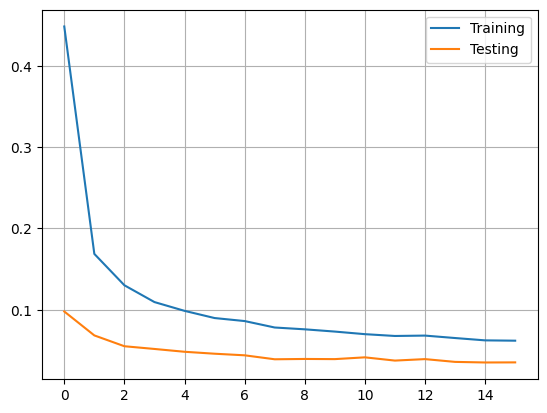

In [18]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

### Misclassified images

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


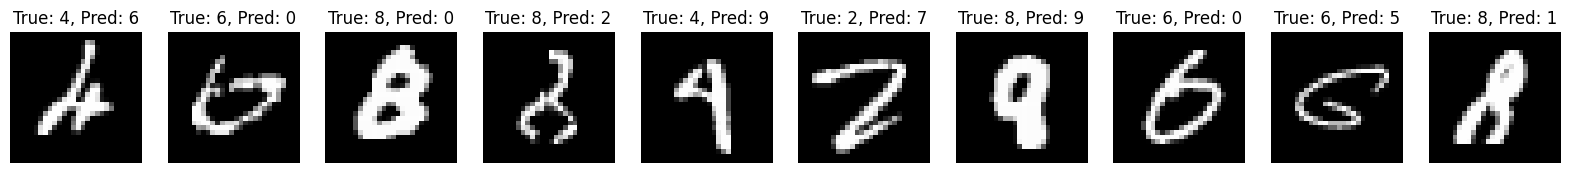

In [19]:
# Function to plot misclassified images
def plot_misclassified_images(X, y_true, y_pred, class_names, max_images=10):
    misclassified_indices = np.where(y_pred != y_true)[0]
    num_misclassified = len(misclassified_indices)
    
    if num_misclassified > 0:
        fig, axes = pl.subplots(1, min(max_images, num_misclassified), figsize=(20, 4))
        for ax, index in zip(axes.flat, misclassified_indices[:max_images]):
            ax.imshow(X[index].reshape(28, 28), cmap='gray', interpolation='none')
            ax.set_title(f"True: {class_names[y_true[index]]}, Pred: {class_names[y_pred[index]]}")
            ax.axis('off')
        pl.show()
    else:
        print("No misclassified images to show.")

# Predicting labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Plot misclassified images
plot_misclassified_images(X_test, y_true_classes, y_pred_classes, class_names=[str(i) for i in range(10)])

Confusion matrix

In [21]:
# Get predictions
pred_classes = np.argmax(y_pred, axis=-1)

# Compute the confusion matrix
cm = sns.confusion_matrix(y_test, pred_classes)

# Plotting using seaborn
pl.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.title('Confusion Matrix')
pl.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


AttributeError: module 'seaborn' has no attribute 'confusion_matrix'